# <center> Визуализация на Python
## <center>Часть 1. Matplotlib


В начале как всегда настроим окружение: импортируем все необходимые библиотеки и немного настроим дефолтное отображение картинок.

In [ ]:
! ls

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

3.3.0


In [ ]:
# для установки библиотек
# ! pip3 install seaborn
#! pip3 install plotly
# ! pip3 install ggplot
# ! pip3 install matplotlib

In [3]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


После этого загрузим в `dataframe` данные, с которыми будем работать. Для примеров визуализаций я выбрала данные о продажах и оценках видео-игр с  [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). Данные об оценках игр есть не для всех строк, поэтому сразу оставим только те записи, по которым есть полные данные.

In [4]:
df = pd.read_csv('video_games_sales.csv')
print(df.shape)

(16719, 16)


In [20]:
#df['User_Score']=pd.to_numeric(df['User_Score'])

ValueError: Unable to parse string "tbd" at position 119

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [38]:
df = df.dropna()
print(df.shape)

(6825, 16)


In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

Всего в таблице 6825 объектов и 16 признаков для них. Посмотрим на несколько первых записей c помощью метода head, чтобы убедиться, что все распарсилось правильно. Для удобства я оставила только те признаки, которые мы будем в дальнейшем использовать.

In [7]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head(10)

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8,322.0,E
1,Super Mario Bros.,NES,1985.0,Platform,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,31.37,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,30.26,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,41.0,6.6,129.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,28.32,87.0,80.0,8.4,594.0,E
9,Duck Hunt,NES,1984.0,Shooter,28.31,NaN,NaN,NaN,NaN,NaN


Начнем с самого простого и зачастую удобного способа визуализировать данные из `pandas dataframe` — это воспользоваться функцией `plot.`
Для примера построим **график продаж видео игр в различных странах в зависимости от года**. Для начала отфильтруем только нужные нам столбцы, затем посчитаем суммарные продажи по годам и у получившегося `dataframe` вызовем функцию `plot` без параметров. 

В библиотеку `pandas` встроен wrapper для `matplotlib`.

In [8]:
[x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [9]:
df1 = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]\
    .groupby('Year_of_Release').sum()
df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36


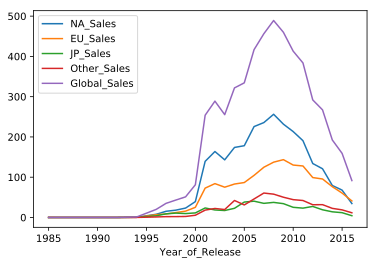

In [31]:
df1.plot();

В этом случае мы сконцентрировались на отображении трендов продаж в разных регионах.

C помощью параметра kind можно изменить тип графика, например, на bar chart. Matplotlib позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметра rot отвечает за угол наклона подписей к оси x.

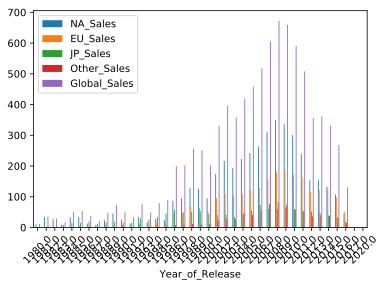

In [10]:
df1.plot(kind='bar', rot=45);

Или можем сделать stacked bar chart, чтобы показать и динамику продаж и их разбиение по рынкам.

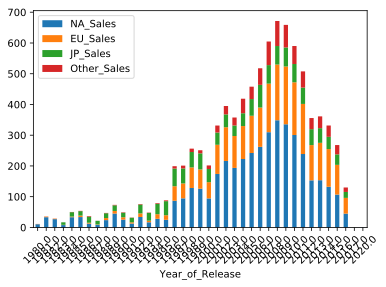

In [11]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='bar', rot=45, stacked=True);

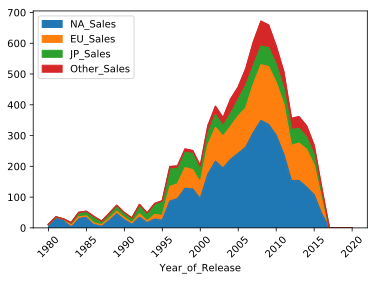

In [12]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='area', rot=45, stacked=True);

Еще один часто встречающийся тип графиков - это гистограммы. Посмотрим на **распределение оценок критиков**.

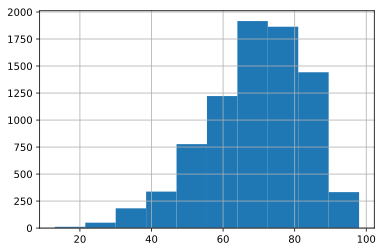

In [13]:
df.Critic_Score.hist()

Text(0,0.5,'games')

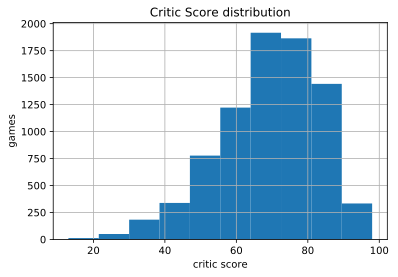

In [14]:
ax = df.Critic_Score.hist()
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games')

У гистограмм можно контролировать, на сколько групп мы разбиваем распределение с помощью параметра `bins`.

Text(0,0.5,'games')

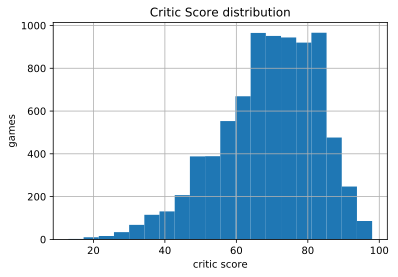

In [15]:
ax = df.Critic_Score.hist(bins = 20)
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games')

Еще немного познакомимся с тем, как в pandas можно стилизовать таблицы.

In [16]:
top_developers_df = df.groupby('Developer')[['Global_Sales']].sum()\
    .sort_values('Global_Sales', ascending=False).head(10)
    
top_developers_df

,Global_Sales
Developer,
Nintendo,531.71
EA Sports,175.38
EA Canada,142.32
Ubisoft,132.54
Rockstar North,119.47
Capcom,115.71
Ubisoft Montreal,108.31
Treyarch,103.16
EA Tiburon,96.12


In [17]:
top_developers_df.style.bar()

,Global_Sales
Developer,
Nintendo,531.71
EA Sports,175.38
EA Canada,142.32
Ubisoft,132.54
Rockstar North,119.47
Capcom,115.71
Ubisoft Montreal,108.31
Treyarch,103.16
EA Tiburon,96.12


### Полезные ссылки
 * [Документация pandas.plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
 * [Документация pandas.style](http://pandas.pydata.org/pandas-docs/stable/style.html)
 * [Документация matplotlib](https://matplotlib.org/)

## <center>Часть 2. Seaborn

Теперь давайте перейдем к библиотеке seaborn. Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Если просто добавить в код import seaborn, то картинки станут гораздо симпатичнее. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков **pair plot (scatter plot matrix)**. Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки. 

In [16]:
import seaborn as sns

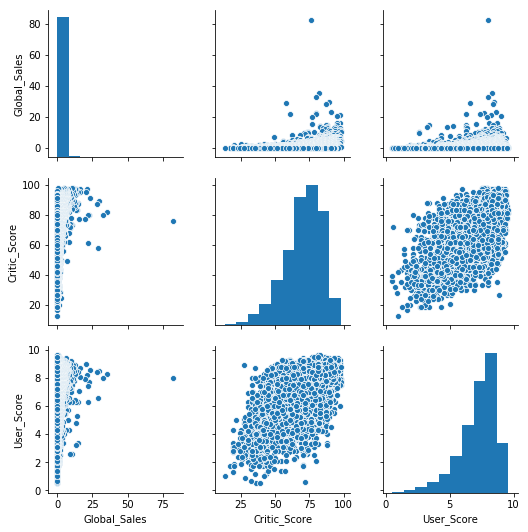

In [36]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    df[['Global_Sales', 'Critic_Score', 'User_Score']]);
sns_plot.savefig('pairplot.png')

Также с помощью `seaborn` можно построить распределение, для примера посмотрим на **распределение оценок критиков `Critic_Score`**. Для этого построим __`distplot`__. По default'у на графике отображается гистограмма и [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

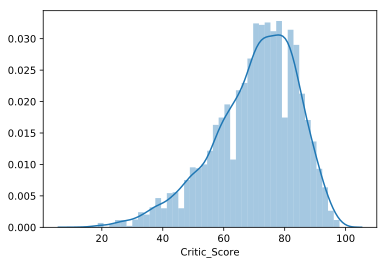

In [37]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(df.Critic_Score);

Для того чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и __`joint_plot`__ – это гибрид `scatter plot` и `histogram` (отображаются также гистограммы распределений признаков). Посмотрим на то, как связаны между собой **оценка критиков `Critic_Score` и оценка пользователя `User_Score`**.

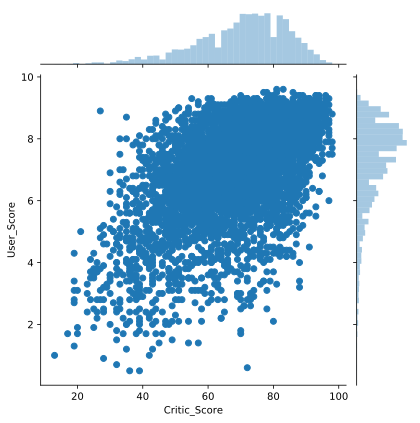

In [38]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

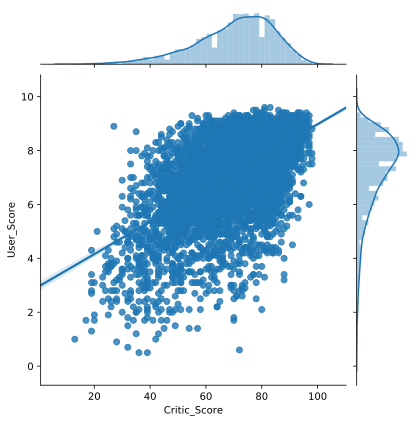

In [39]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='reg');

Еще один полезный тип графиков - это __`box plot`__. Давайте **сравним пользовательские оценки игр для топ-5 крупнейших игровых платформ**.

In [40]:
df.Platform.value_counts().head(5).index.values

array(['PS2', 'X360', 'PS3', 'PC', 'XB'], dtype=object)

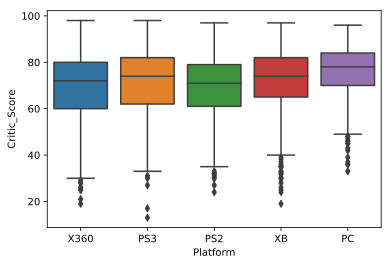

In [41]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(x="Platform", y="Critic_Score", 
            data=df[df.Platform.isin(top_platforms)])

Думаю, стоит обсудить немного подробнее, как же понимать `box plot`. `Box plot` состоит из коробки (поэтому он и называется `box plot`), усиков и точек. Коробка показывает интерквантильный размах распределения, то есть соответственно 25% (`Q1`) и 75% (`Q3`) процентили. Черта внутри коробки обозначает медиану распределения. 
С коробкой разобрались, перейдем к усам. Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток `(Q1 - 1.5*IQR, Q3 + 1.5*IQR)`, где `IQR = Q3 - Q1` - интерквантильный размах. Точками на графике обозначаются выбросы (`outliers`) - те значения, которые не вписываются в промежуток значений, заданный усами графика.


И еще один тип графиков (последний из тех, которые мы рассмотрим в этой части) - это __`heat map`__. `Heat map` позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем **суммарные продажи игр по жанрам и игровым платформам**.

In [18]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)

platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,29.34,1.70,1.24,3.58,13.27,14.68,2.91,0.00,26.48,0.45,3.43,0.00
3DO,0.00,0.06,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00
3DS,58.33,4.90,10.57,10.98,32.52,5.55,14.94,84.29,1.29,27.43,6.19,2.10
DC,1.26,2.50,1.83,0.00,2.54,0.00,2.65,0.68,0.33,0.52,3.66,0.00
DS,112.70,45.90,7.11,135.72,75.92,82.72,38.10,124.44,7.92,130.29,31.41,14.87
GB,7.92,17.16,0.00,13.35,54.91,47.47,4.55,88.24,1.20,3.55,9.05,8.05
GBA,55.76,14.68,4.21,36.25,78.30,12.92,18.80,64.21,3.60,5.91,16.41,7.45
GC,37.84,5.93,18.43,16.73,28.66,4.70,21.89,13.15,13.63,8.59,25.49,4.32
GEN,2.74,0.19,5.90,0.03,15.45,0.00,0.26,0.27,0.13,0.00,3.20,0.19


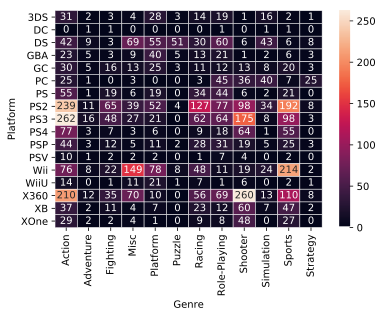

In [43]:
sns.heatmap(platform_genre_sales, annot=True, fmt=".0f", 
            linewidths=0.5);

### Полезные ссылки
* [Tutirial](https://seaborn.pydata.org/tutorial.html)
* [Gellery](https://seaborn.pydata.org/examples/index.html)

## <center>Часть 3. Plotly

Мы рассмотрели визуализации на базе библиотеки `matplotlib`. Однако, это не единственная опция для построения графиков на языке `python`. Познакомимся также с библиотекой __`plotly`__. `Plotly` - это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook'e без необходимости зарываться в javascript код. 

Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мыши, скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.

Перед началом работы импортируем все необходимые модули и инициализируем `plotly` с помощью команды `init_notebook_mode`.

In [19]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Для начала построим __`line plot` с динамикой числа вышедших игр и их продаж по годам__. 

In [20]:
global_sales_years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum()
global_sales_years_df.head()

,Global_Sales
Year_of_Release,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36


In [21]:
released_years_df = df.groupby('Year_of_Release')[['Name']].count()
released_years_df.head()

,Name
Year_of_Release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14


In [22]:
years_df = global_sales_years_df.join(released_years_df)
years_df.head()

,Global_Sales,Name
Year_of_Release,,
1980.0,11.38,9
1981.0,35.77,46
1982.0,28.86,36
1983.0,16.79,17
1984.0,50.36,14


In [23]:
years_df.columns = ['Global_Sales', 'Number_of_Games']
years_df.head()

,Global_Sales,Number_of_Games
Year_of_Release,,
1980.0,11.38,9
1981.0,35.77,46
1982.0,28.86,36
1983.0,16.79,17
1984.0,50.36,14


В `plotly` строится визуализация объекта `Figure`, который состоит из данных (массив линий, которые в библиотеке называются `traces`) и оформления/стиля, за который отвечает объект `layout`. В простых случаях можно вызывать функцию `iplot` и просто от массива `traces`.

In [24]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Также можно сразу сохранить график в виде html-файла.

In [50]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False);

Посмотрим также на __рыночную долю игровых платформ, расчитанную по количеству выпущенных игр и по суммарной выручке__. Для этого построим __`bar chart`__.

In [25]:
global_sales_platforms_df = df.groupby('Platform')[['Global_Sales']].sum()
released_platforms_df = df.groupby('Platform')[['Name']].count()
platforms_df = global_sales_platforms_df.join(released_platforms_df)

platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', inplace=True)
platforms_df = platforms_df.apply(lambda x: 100*x/platforms_df.sum(), axis = 1)
platforms_df.head()

,Global_Sales,Number_of_Games
Platform,,
PCFX,0.000336,0.005982
GG,0.000448,0.005982
3DO,0.001121,0.017946
TG16,0.001794,0.011964
WS,0.015919,0.035892


In [18]:
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales',
    orientation = 'v'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Platforms share'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

В `plotly` можно построить и __`box plot`__. Рассмотрим __различия оценок критиков в зависимости от жанра игры__.

In [34]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [33]:
data = []

for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, 
               name=genre)
    )
iplot(data, show_link = False)

Давайте посмотрим на график зависимости средней оценки пользователей и оценки критиков по жанрам. Это будет обычный scatter plot.

In [41]:
scores_genres_df = df.groupby('Genre')[['Critic_Score', 'User_Score']].mean()
sales_genres_df = df.groupby('Genre')[['Global_Sales']].sum()

genres_df = scores_genres_df.join(sales_genres_df)
    
genres_df.head()

,Critic_Score,User_Score,Global_Sales
Genre,,,
Action,67.828834,7.095828,1203.16
Adventure,66.133065,7.160887,80.75
Fighting,69.732804,7.301852,249.95
Misc,67.460938,6.849740,416.26
Platform,70.000000,7.377171,377.80


In [42]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers'
)

data = [trace0]
layout = {'title': 'Statistics of video games genres'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Пока что ничего непонятно, давайте добавим к точкам подписи.

In [43]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers+text',
    text = genres_df.index,
    textposition='bottom'
)

data = [trace0]
layout = {'title': 'Statistics of video games genres'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'textposition' property of scatter
        Received value: 'bottom'

    The 'textposition' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['top left', 'top center', 'top right', 'middle left',
            'middle center', 'middle right', 'bottom left', 'bottom
            center', 'bottom right']
      - A tuple, list, or one-dimensional numpy array of the above

Далее добавим на график еще одно измерение - размер жанра (суммарный объем продаж, который мы заранее посчитали) и получим bubble chart.

In [44]:
genres_df.index

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [45]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers+text',
    text = genres_df.index,
    #textposition='bottom',
    marker = dict(
        size = 1/10*genres_df.Global_Sales,
        color = [
            'aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'salmon',
            'wheat', 'ivory', 'silver'
        ]
    )
)

data = [trace0]
layout = {
    'title': 'Statistics of video games genres',
    'xaxis': {'title': 'Critic Score'},
    'yaxis': {'title': 'User Score'}
}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

В plotly есть возможность делать графики в drop down menus, когда в зависимости от выбранного среза будут отображаться различные графики. Давайте построим __гистораммы распределений оценок пользователей по жанрам__.

In [46]:
traces = []
for genre in ['Racing', 'Shooter', 'Sports', 'Action']:
    traces.append(
        go.Histogram(
            x=df[df.Genre == genre].User_Score,
            histnorm='probability', 
            name = genre, 
            visible = (genre == 'Racing'))
    )
    
layout = go.Layout(
    title='User Score Distribution',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True] + [False]*3],
                    label='Racing',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True] + [False]*2],
                    label='Shooter',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*2 + [True] + [False]],
                    label='Sports',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*3 + [True]],
                    label='Action',
                    method='restyle'
                )
            ]),
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

Немного отвлечемся от данных об играх и рассмотрим еще один тип графика, который можно построить в plotly и они могут быть очень полезны, например, для web-аналитики - это __воронка или funnel пользователя на сайте__.
В plotly на данный момент нет функции, которая умеет строить воронки из коробки, но с помощью svg фигур ее достаточно легко построить. Этот пример покажет нам, насколько легко можно кастомизировать библиотеку под свои нужды.

In [47]:
# chart stages data
values = [40000, 17567, 7443, 3290, 2567]
phases = ['Main Page', 'Catalog', 'Product Details', 'Cart', 'Purchase']
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)']

In [48]:
n_phase = len(phases)
plot_width = 400

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(values)

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in values]

# plot height based on the number of sections and the gap in between them
height = section_h * n_phase + section_d * (n_phase - 1)

In [49]:
# list containing all the plot shapes
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)

# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(40,40,40)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(40,40,40)',
        size=15
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(0,0,0)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(255,255,255,1)',
    plot_bgcolor='rgba(255,255,255,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
        showgrid=False,
        range=[-450, 450]
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False,
        showgrid=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

### Обертки для plotly
Как вы могли заметить, описывать все traces бывает достаточно многословно. Поэтому для частых cases удобно написать функции-обертки на DataFrame. Мои самые частые сценарии - это line plot и несколько line plots с drop down.

In [50]:
def plotly_line_plot(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [51]:
plotly_line_plot(
    df1,
    title = 'Sales of Video Games'
)

In [52]:
def get_num_columns(dfs):
    if len(dfs) == 0:
        return 0
    return sum(list(map(lambda x: len(x.columns), dfs)))

def plotly_dropdown_line_plots(slices, title):
    slices_lst = list(slices.keys())
    N_slices = len(slices_lst)

    traces_dm = []
    buttons = []
    
    for i in range(N_slices):
        slice = slices_lst[i]
        df = slices[slice]
        
        dfs_before = list(slices.values())[:i]
        dfs_after = list(slices.values())[i+1:]

        num_before = get_num_columns(dfs_before)
        num_after = get_num_columns(dfs_after)
        
        for col in df.columns:
            traces_dm.append(
                go.Scatter(
                    x = df.index,
                    y = df[col],
                    name = col,
                    visible = (i == 0),
                    mode = 'lines'
                )
            )

        buttons.append(
            dict(
                label = slice,
                method = 'restyle',
                args = ['visible', [False]*num_before + [True]*len(df.columns) + [False]*num_after]
            )
        )
    layout = go.Layout(
        title = title,
        updatemenus = [
            dict(
                x = -0.05,
                y = 1,
                yanchor = 'top',
                buttons = buttons,
            )
        ]
    )
    fig = go.Figure(data=traces_dm, layout=layout)
    iplot(fig, show_link=False)

In [53]:
genre_slices = {}

In [54]:
for genre in df.Genre.unique():
    genre_slices[genre] = df[df.Genre == genre]\
        .groupby('Year_of_Release')[list(filter(lambda x: 'Sales' in x, df.columns))].sum()

In [55]:
genre_slices.keys()

dict_keys(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle', 'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure', 'Strategy'])

In [57]:
genre_slices['Action'].head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1996,5.30,3.20,1.24,0.97,10.71
1997,0.95,0.64,0.27,0.13,1.99
1998,6.19,5.37,2.80,0.91,15.27
1999,4.66,3.85,0.32,0.53,9.38
2000,6.81,5.58,2.08,0.94,15.40


In [58]:
plotly_dropdown_line_plots(genre_slices, title = 'Sales of Video Games by genre')

### Полезные ссылки
* [Галерея](https://plot.ly/python/)
* [Документация](https://plot.ly/python/reference/)